# documentation.functions


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir('..')

Here we present the documentation for the functions `maxcut_utilities.py`, `qaoa_utilities.py` and `optimizers.py`, contained in the module `functions` of the `qaoa` project. These functions are to be used together and in conjunction with the `qaoa.py` class (see ...) to solve combinatorial optimization problems with Quantum Approximate Optimization Algorithms. 
```
qaoa
    |
    |_ functions
        |
        |_ maxcut_utilities.py
        |
        |_ qaoa_optimizers.py
        |
        |_ qaoa_utilities.py
        |
        |_ symetry_utilities.py
    |
    .
    .
    .  
```

## maxcut_utilities
The functions in `maxcut_utilities.py` are auxiliary functions that allow compute intermediary values (e.g. the cut-value associated to a given bit-string) to solve the MaxCut problem with qaoa-type strategies. 

In [3]:
from functions import maxcut_utilities

### compute_max_cut_exactly
`compute_max_cut_exactly(G)`

Takes a graph created with the Problems class and returns the corresponding max-cut, calculated exactly with a brute-force approach.

**Args**
* `G` (graph): A graph representing the problem instance to be solved with qaoa. Note: `G` is an object created with the Problems class. (see...).

**Returns**
* `best_cost_brute` (int): The max-cut.

In [4]:
import networkx 
from classes import Problems

G = networkx.Graph()
G.add_edges_from([[0,3],[0,4],[1,3],[1,4],[2,3],[2,4]])
instance = Problems.Problems(G=G)
maxcut = maxcut_utilities.compute_max_cut_exactly(instance)
print(maxcut)

6


### invert_counts
`invert_counts(counts)`

Takes a dictionary with the counts of a Qiskit experiment (qaoa execution) and reorder it in order to match Qaiskit qubit notation conventions.

**Args**
* `counts` (dict): a dictionary with the counts related to the measurement of the qaoa circuit.

**Returns**
* `rearranged_counts` (dict): a rearranged dictionray where the keys are ordered followin Qiskit conventions.

In [5]:
counts = {'11000': 1, '00011': 29, '01011': 24}
rearranged_counts = maxcut_utilities.invert_counts(counts)
print(rearranged_counts)

{'00011': 1, '11000': 29, '11010': 24}


### get_maxcut_number_of_edges
`get_maxcut_number_of_edges(G,x)`

**Args**
* `G` (graph): A graph representing the problem instance to be solved with qaoa. Note: `G` is an object created with the Problems class. (see...).
* `x` (list): A list with the nodes of `G`, which is associated with a bit string of the current problem instance.

**Returns**
* `cut` (int): The cut-value corresponding to the node assignment (string) considered. Note: the `cut` is calculated as a negative value for compatibility reasons related to the use of `scipy.minimize`.



In [6]:
cut_value = maxcut_utilities.get_maxcut_number_of_edges(instance,"10011")
print(-cut_value)

4


### compute_maxcut_energy
`compute_maxcut_energy(G, counts, verbose)`

**Args**
* `G` (graph): A graph representing the problem instance to be solved with qaoa. Note: `G` is an object created with the Problems class.
* `counts` (dict): a dictionary with the counts related to the measurement of the qaoa circuit.
* `verbose` (bool): A boolean variable allowing the user to select the debugging mode (where extensive comments are provided). If True enters in debugging mode. The default is `False`.

**Returns**
* `-approximate_energy` (float): The approximate MaxCut value of current qaoa execution. Note: the `approximate_energy` returned with a minus sign for compatibility reasons related to the use of `scipy.minimize` and the previous functions.

In [7]:
approximate_result = maxcut_utilities.compute_maxcut_energy(instance,counts)
print(approximate_result)

5.074074074074074


## qaoa_optimizers

The functions contained in `qaoa_optimizers.py` are to be used to find optimal angles and optimal value of a qaoa problem instance. 

 --------------------------- 
| INTIALIZING QAOA CLASS... |
 --------------------------- 
-> GETTING PROBLEM INSTANCE...


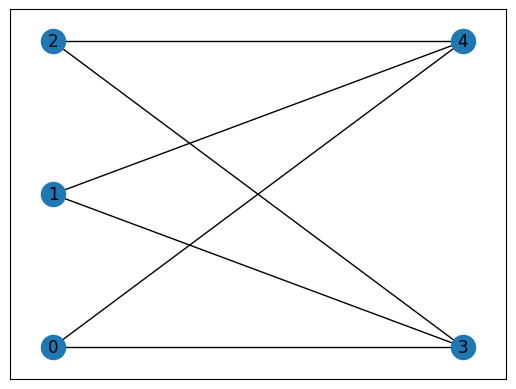

-> GETTING THE ANSATZ...
     ┌───┐ ░                                                                   »
q_0: ┤ H ├─░───■─────────────────────■────■────────────────────────────────────»
     ├───┤ ░   │                     │    │        ┌───┐      ┌───────────────┐»
q_1: ┤ H ├─░───┼─────────────────────┼────┼────────┤ X ├──────┤ Rz(params[3]) ├»
     ├───┤ ░   │                     │    │        └─┬─┘      └───────────────┘»
q_2: ┤ H ├─░───┼─────────────────────┼────┼──────────┼─────────────────────────»
     ├───┤ ░ ┌─┴─┐┌───────────────┐┌─┴─┐  │          │                         »
q_3: ┤ H ├─░─┤ X ├┤ Rz(params[3]) ├┤ X ├──┼──────────■─────────────────────────»
     ├───┤ ░ └───┘└───────────────┘└───┘┌─┴─┐┌───────────────┐                 »
q_4: ┤ H ├─░────────────────────────────┤ X ├┤ Rz(params[3]) ├─────────────────»
     └───┘ ░                            └───┘└───────────────┘                 »
c: 5/══════════════════════════════════════════════════════════════════════════»
   

In [8]:
from classes import Qaoa

instance = Problems.Problems()
qaoa = Qaoa.Qaoa(p=3, G=instance)

### objective_function
`objective_function(init_point, circuit)`

Gets the objective function for the qaoa-optimization process.

**Args**
* `init_point` (list): initial guess of the optimal angles for the qaoa instance.
* `circuit` (classes.Qaoa.Qaoa): qaoa instance.

**Returns**
* `- energy` (float): the MaxCut value associated to the given initial angles. Note: `energy` is positive, but, for technical reasons related to the use of `scipy.minimize), the returned value should be negative.

In [9]:
from functions import qaoa_optimizers 

init_point = qaoa.betas + qaoa.gammas
maxcut_value = qaoa_optimizers.objective_function(init_point,qaoa,shots=100)
print("energy", maxcut_value)

energy -2.85


### callback
`callback(x)`

A callable called after each iteration whose results are stored in a global variable called `num_evaluations` which starts from zero and is incremented by one each time `callback` is executed. This function is passed to the `callback` option of the `scipy.minimize` method.

**Args**
* `x`(list): An intermediate optimal result.


In [10]:
qaoa_optimizers.callback([])

### simple_optimization
`simple_optimization(circuit, method, seed, verbose)`

**Args**

* `circuit` (classes.Qaoa.Qaoa): qaoa instance;
* `method` (str): scipy.minimize optimization method. The default si COBYLA.
* `verbose` (bool): A boolean variable allowing the user to select the debugging mode (where extensive comments are provided). If True enters in debugging mode. The default is `False`.

**Retruns**

* `(optimal_angles, optimal value)` (tuple): Optimized angles and optimal value.

In [11]:
x, f = qaoa_optimizers.simple_optimization(qaoa)

 --------------------------------- 
| PARAMETERS FOR THE OPTIMIZATION. |
 --------------------------------- 
	 * betas: [1.5394425488183923, 1.4511537386946374, 0.41949284559101646]
	 * gammas: [4.048287862553348, 1.0411182294310912, 1.238792927685793]
	 * init_point: [1.5394425488183923, 1.4511537386946374, 0.41949284559101646, 4.048287862553348, 1.0411182294310912, 1.238792927685793]
 --------------- 
| OPTIMIZING... |
 --------------- 
 --------- 
| RESULTS. |
 --------- 
	 * optimal_anlges: [1.33371134 2.4342898  0.3989869  4.05154377 1.10656761 1.12648478]
	 * optimal_value: 4.939453125


## qaoa_utilities
The functions in `qaoa_utilities.py` are auxiliary functions to generate qaoa-parameters, change the qaoa-mixer operator, and so on...

In [12]:
from functions import qaoa_utilities

### generate_parameters
`generate_parameters(n, k, randomness, seed)`

Generates a list of random angles.

**Args**
* `n` (int): Size of the random sample.
* `k` (int): a multiplicative factor to generate samples in [0,kπ).
* `randomness` (str): Type if random sample. The default is 'uniform'. Note: Only uniform randomness has been implemented.
* `seed` (int): A seed for the pseudorandom generator. Needed for reproducibility. the default is None

**Returns**
* `angles` (list): A list of random angles.


In [13]:
two_random_angles = qaoa_utilities.generate_parameters(2,1)
print(two_random_angles)

[2.0197381706253927, 0.14738660368522355]


## symmetry_utilities
The functions in `symmetry_utilities` provide informations about the symmetries in a graph instance (number of automorphisms, symmetry generatores, etc...).

In [14]:
#pip install --no-binary pynauty pynauty

In [15]:
from functions import symmetry_utilities

### get_number_of_automorphisms
`get_number_of_automorphisms(G, adjacency_dict)`

Calculates the size of the automorphism group Aut(G) of the graph G.

**Args**
* `G` (graph): The graph whose symmetries are to be studied. Note: `G` is an object created with the Problems class.
* `adjacency_dict` (dict): The adjacency dictionary of the current graph instance. Note: `adjacency_dict` should be created with the `get_adjacency_dict()` method of the Problems class.

**Returns**
* `num_automorphisms` (int): The size of Aut(G). 

In [16]:
instance = Problems.Problems(G=G)
adjacency_dict = instance.get_adjacency_dict()
num_automorphisms = symmetry_utilities.get_number_of_automorphisms(G=instance, adjacency_dict=adjacency_dict)
print(num_automorphisms)

12


### get_symmetry_generators
`get_symmetry_generators(G adjacency_dict)`

Calculates the generators of Aut(G).

**Args**
* `G` (graph): The graph whose symmetries are to be studied. Note: `G` is an object created with the Problems class.
* `adjacency_dict` (dict): The adjacency dictionary of the current graph instance. Note: `adjacency_dict` should be created with the `get_adjacency_dict()` method of the Problems class.

**Returns**
* `generators ` (ndarray): The generators of Aut(G) as a matrix where each generator is a row. 

In [17]:
generators = symmetry_utilities.get_symmetry_generators(G=instance, adjacency_dict=adjacency_dict)
print(generators)

[[0, 1, 2, 4, 3], [0, 2, 1, 3, 4], [1, 0, 2, 3, 4]]


get_symmetry_orbits(G: Graph, adjacency_dict: dict) -> Tuple[int, List]:
### get_symmetry_orbits
`get_symmetry_orbits(G adjacency_dict)`

Calculates the orbits in Aut(G) and the size of the orbit subgroup.

**Args**
* `G` (graph): The graph whose symmetries are to be studied. Note: `G` is an object created with the Problems class.
* `adjacency_dict` (dict): The adjacency dictionary of the current graph instance. Note: `adjacency_dict` should be created with the `get_adjacency_dict()` method of the Problems class.

**Returns**
* `num_orbits, orbits` (tuple): number of orbits, orbits.

In [18]:
num_orbits, orbits = symmetry_utilities.get_symmetry_orbits(G=instance, adjacency_dict=adjacency_dict)
print(num_orbits, orbits)

2 [0, 0, 0, 3, 3]
